# Trabalho 1 - Nivelamento

Considere os datasets abaixo, estratégias de pré-processamento, medidas de avaliação, métodos de comparação estatística e os seguintes algoritmos de aprendizado de máquina: árvore de decisão, random forest e k-nearest neighbor. A partir disso, responda as seguintes perguntas:

1. Qual o algoritmo de AM mais adequado para cada problema?
2. Qual o algoritmo de AM mais adequado para todos os problemas?

Para responder essas questões construa um notebook no colab ou um ambiente similar. Documente de forma clara cada passo e justifique suas decisões.

### Datasets
Considere os seguintes datasets:

+ **Arrhythmia:** Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). [link](https://www.openml.org/search?type=data&sort=runs&id=1017&status=active)

+ **Airlines:** Airlines Dataset Inspired in the regression dataset from Elena Ikonomovska. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure. [link] (https://www.openml.org/search?type=data&sort=runs&id=1169&status=active)

+ **Phoneme:** The aim of this dataset is to distinguish between nasal (class 0) and oral sounds (class 1). Five different attributes were chosen to characterize each vowel: they are the amplitudes of the five first harmonics AHi, normalised by the total energy Ene (integrated on all the frequencies): AHi/Ene. The phonemes are transcribed as follows: sh as in she, dcl as in dark, iy as the vowel in she, aa as the vowel in dark, and ao as the first vowel in water. [link] (https://www.openml.org/search?type=data&sort=runs&id=1489&status=active)

+ **Phishing Websites:** One of the challenges faced by our research was the unavailability of reliable training datasets. In fact this challenge faces any researcher in the field. However, although plenty of articles about predicting phishing websites have been disseminated these days, no reliable training dataset has been published publically, may be because there is no agreement in literature on the definitive features that characterize phishing webpages, hence it is difficult to shape a dataset that covers all possible features. In this dataset, we shed light on the important features that have proved to be sound and effective in predicting phishing websites. [link](https://www.openml.org/search?type=data&sort=runs&id=4534&status=active)

+ **Satellite:** The satellite dataset comprises of features extracted from satellite observations. In particular, each image was taken under four different light wavelength, two in visible light (green and red) and two infrared images. The task of the original dataset is to classify the image into the soil category of the observed region. [link](https://www.openml.org/search?type=data&sort=runs&id=40900&status=active)

+ **Adult:** Prediction task is to determine whether a person makes over 50K a year. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).[link](https://www.openml.org/search?type=data&sort=runs&id=1590&status=active)

+ **AedesSex:** This dataset has features of sounds gathered using a infrared sensor from _Ae. aegypti_ mosquitoes. The objetive is to classify males and females mosquitoes from their sounds. **Sex** feature is the label. [link](https://github.com/denismr/Classification-and-Counting-with-Recurrent-Contexts/blob/master/codeAndData/data/AedesSex.csv)



### Nome:

In [120]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import tree
from scipy.io import arff

In [121]:
df = arff.loadarff("dataset/arrhythmia.arff")
df = pd.DataFrame(df[0])
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,b'0',190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,b'N'
1,56.0,b'1',165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,b'N'
2,54.0,b'0',172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,b'N'
3,55.0,b'0',175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,b'P'
4,75.0,b'0',190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,b'1',160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,b'P'
448,37.0,b'0',190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,b'N'
449,36.0,b'0',166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,b'N'
450,32.0,b'1',155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,b'P'


### Converter byte

In [122]:
df["binaryClass"] = df["binaryClass"].str.decode('utf-8') 
df["sex"] = pd.to_numeric(df["sex"].str.decode('utf-8'))

In [123]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,N
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,N
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,N
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,P
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,P
448,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,N
449,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,N
450,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,P


In [124]:
# pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False).head(10)
df.isnull().sum().sort_values( ascending=False).head(10)

J                  376
P                   22
T                    8
QRST                 1
heartrate            1
chAVR_SwaveAmp       0
chAVR_RwaveAmp       0
chAVR_QwaveAmp       0
chAVR_JJwaveAmp      0
chDIII_QRSTA         0
dtype: int64

In [125]:
df.drop("J",axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

In [126]:
pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False).head(10)

,0
age,0
chDIII_PwaveAmp,0
chAVR_RwaveAmp,0
chAVR_QwaveAmp,0
chAVR_JJwaveAmp,0
chDIII_QRSTA,0
chDIII_QRSA,0
chDIII_TwaveAmp,0
chDIII_SPwaveAmp,0
chDII_TwaveAmp,0


In [127]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,N
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,N
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,N
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,P
5,13.0,0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,P
448,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,N
449,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,N
450,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,P


<AxesSubplot:>

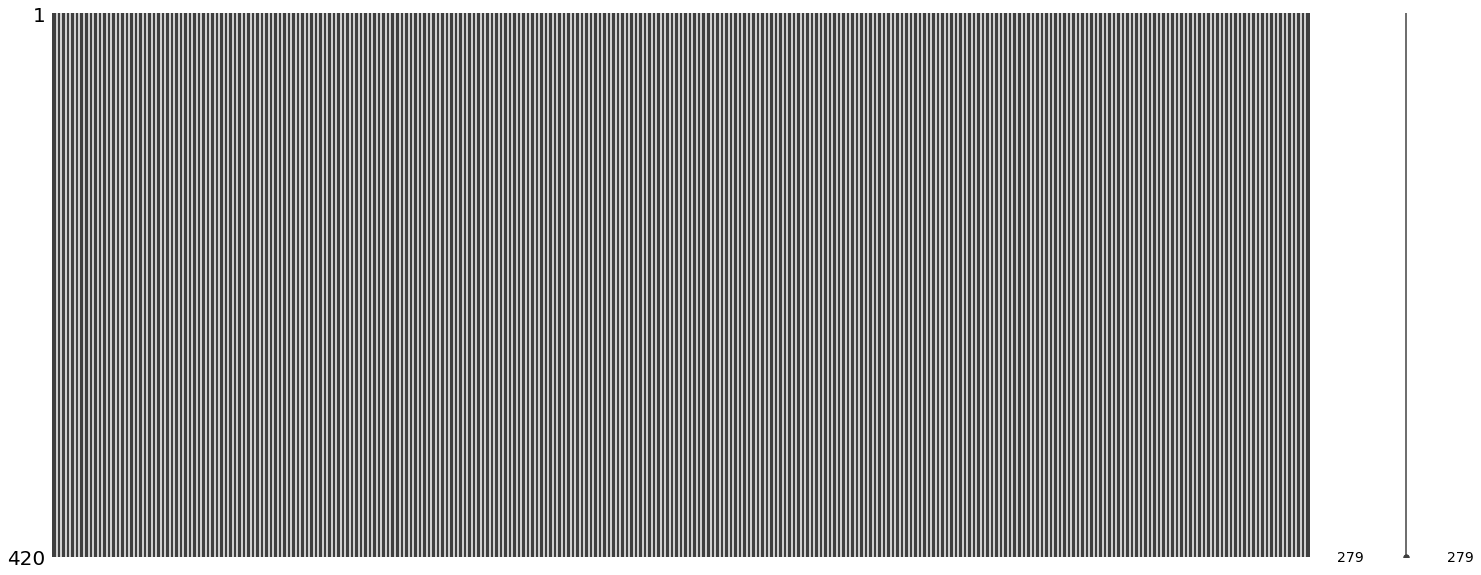

In [128]:
msno.matrix(df)

P    237
N    183
Name: binaryClass, dtype: int64


<AxesSubplot:title={'center':'Count (binaryClass)'}>

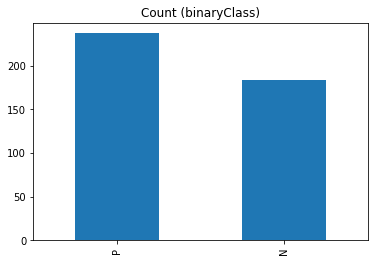

In [129]:
df_count_target = df['binaryClass'].value_counts()
# df_count_target

print(df_count_target)
df_count_target.plot(kind='bar', title='Count (binaryClass)')

## KNN

In [130]:
df['binaryClass'].replace(["N", "P"],[0,1], inplace=True)
df.shape

(420, 279)

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.233333,0.590244,0.457478,...,1.000000,0.381356,0.968531,0.0,0.0,0.53125,0.741667,0.507519,0.569579,0.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.140741,0.190244,0.577713,...,1.000000,0.360169,1.000000,0.0,0.0,0.31250,0.675000,0.485714,0.500971,0.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.274074,0.497561,0.785924,...,1.000000,0.402542,0.916084,0.0,0.0,0.34375,0.783333,0.424812,0.566990,0.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.251852,0.697561,0.586510,...,1.000000,0.516949,0.923077,0.0,0.0,0.37500,0.716667,0.592481,0.648544,1.0
4,0.156627,0.0,0.094815,0.264706,0.338346,0.318702,0.321300,0.233333,0.443902,0.818182,...,0.853659,0.516949,0.902098,0.0,0.0,0.53125,0.683333,0.433835,0.451133,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.159259,0.570732,0.395894,...,1.000000,0.182203,0.825175,0.0,0.0,0.46875,0.550000,0.299248,0.246602,1.0
416,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.333333,0.356098,0.756598,...,1.000000,0.661017,0.944056,0.0,0.0,0.37500,0.700000,0.618045,0.653722,0.0
417,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.307407,0.565854,0.255132,...,1.000000,0.690678,0.000000,0.0,0.0,0.71875,0.583333,0.000000,0.034951,0.0
418,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.396296,0.307317,0.662757,...,0.902439,0.508475,0.975524,0.0,0.0,0.40625,0.700000,0.520301,0.551456,1.0


In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = df.drop(['binaryClass'],axis=1)
# x
y = df['binaryClass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_1 = KNeighborsClassifier(n_neighbors=3)
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.94%


In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

def chi_selection(data, target, nattr):
  cor_list = []
  X_norm = MinMaxScaler().fit_transform(data)

  chi_selector = SelectKBest(chi2, k=nattr)
  chi_selector.fit(X_norm, target)
  chi_support = chi_selector.get_support() 
  chi_selected = data.loc[:,chi_support].columns.tolist()  

  return chi_selected, chi_support

In [134]:
chi_selected, chi_support = chi_selection(x, y, 10)
x = x[chi_selected]
# chi_selected
x

,sex,chV1_RPwave,chV1_DD_RRwaveExists,chV2_Qwave,chV2_RPwave,chV3_Qwave,chV3_DD_RTwaveExists,chV4_Qwave,chV4_DD_RTwaveExists,chV1_RPwaveAmp
0,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
1,1.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
2,0.0,0.95,0.0,0.000000,0.833333,0.00000,0.0,0.0,0.0,0.338542
3,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
4,0.0,0.00,0.0,0.151515,0.000000,0.26087,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
415,1.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
416,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
417,0.0,0.55,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.656250
418,1.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000


In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [136]:
model_1 = KNeighborsClassifier(n_neighbors=50)
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.94%
